# Random forest classifier for predicting flight price 

## reading data 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Clean_Dataset.csv')

## Understanding data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.describe()    # --> Unnamed: 0 will be dropped

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
data.airline.value_counts()    # --> this will be hot encoded

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [7]:
data.flight.value_counts()    # --> this will be dropped

flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: count, Length: 1561, dtype: int64

In [8]:
data.source_city.value_counts()    # --> this will be hot encoded

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [9]:
data.departure_time.value_counts()    # --> this will be hot encoded

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [10]:
data.stops.value_counts()    # --> this will be factorized to be 0, 1, and 2

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

In [11]:
data.arrival_time.value_counts()    # --> this will be hot encoded

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [12]:
data.destination_city.value_counts()    # --> this will be hot encoded

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [13]:
data['class'].value_counts()    # --> this will be binary encoded

class
Economy     206666
Business     93487
Name: count, dtype: int64

## Preprocessing

### Droppping

In [14]:
data = data.drop('Unnamed: 0', axis=1)

In [15]:
data = data.drop("flight", axis = 1)

### Binary encoding

In [16]:
data['class'] = data['class'].apply(lambda x : 1 if x == 'Business' else 0)

### Factorization

In [17]:
data.stops = pd.factorize(data.stops)[0]

### One Hot Encoding

In [18]:
data = data.join(pd.get_dummies(data['airline'], dtype='int', prefix='airline')).drop('airline', axis=1)
data = data.join(pd.get_dummies(data['source_city'], dtype='int', prefix='source_city')).drop('source_city', axis=1)
data = data.join(pd.get_dummies(data['departure_time'], dtype='int', prefix='departure_time')).drop('departure_time', axis=1)
data = data.join(pd.get_dummies(data['arrival_time'], dtype='int', prefix='arrival_time')).drop('arrival_time', axis=1)
data = data.join(pd.get_dummies(data['destination_city'], dtype='int', prefix='destination_city')).drop('destination_city', axis=1)

In [19]:
data.head()

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Training 

In [20]:
# We will use Random forest regressor as our model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [22]:
# split the features and the labels
X = data.drop('price', axis=1)
y = data['price']

In [23]:
print(X.shape, y.shape)

(300153, 34) (300153,)


In [24]:
# split features and labels into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [25]:
model = RandomForestRegressor()

In [26]:
model.fit(X_train, y_train)

RandomForestRegressor()

## Testing

In [27]:
# this is the R2 score
model.score(X_test, y_test)

0.985885099748378

## Ploting our results vs the real prices

In [28]:
import matplotlib.pyplot as plt

In [29]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Predicted Price')

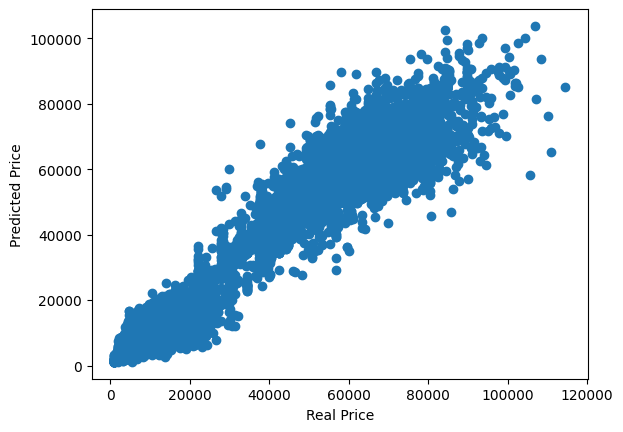

In [30]:
plt.scatter(y_test, y_pred)
plt.xlabel('Real Price')
plt.ylabel('Predicted Price')